In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
sns.set_palette("colorblind")

%matplotlib inline

In [3]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
money_columns = ['production_budget','domestic_gross','worldwide_gross']
tn_movie_budgets[money_columns] = tn_movie_budgets[money_columns].replace([',','\$'], '', regex = True).astype(int)
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets['ROI'] = tn_movie_budgets['profit'] / tn_movie_budgets['production_budget']
tn_movie_budgets['profit_margin'] = tn_movie_budgets['profit'] / tn_movie_budgets['worldwide_gross'] * 100
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].str.lower()
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].replace([':','\.','\,',"'",'!'], '', regex = True)
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])


tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,profit_margin
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,5.532577,84.692106
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,635063875,1.546673,60.733080
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,-0.572108,-133.703598
3,4,2015-05-01,avengers age of ultron,330600000,459005868,1403013963,1072413963,3.243841,76.436443
4,5,2017-12-15,star wars ep viii the last jedi,317000000,620181382,1316721747,999721747,3.153696,75.925058
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,red 11,7000,0,0,-7000,-1.000000,-inf
5778,79,1999-04-02,following,6000,48482,240495,234495,39.082500,97.505146
5779,80,2005-07-13,return to the land of wonders,5000,1338,1338,-3662,-0.732400,-273.692078
5780,81,2015-09-29,a plague so pleasant,1400,0,0,-1400,-1.000000,-inf


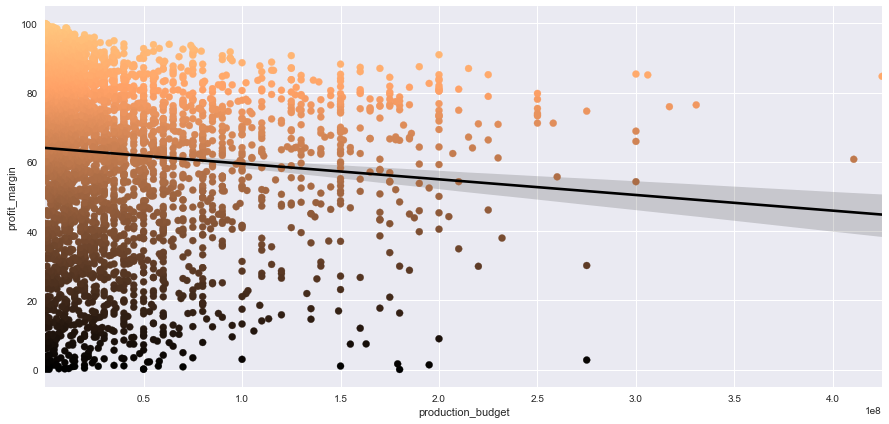

In [4]:
fig, ax = plt.subplots(figsize = (15,7))
profitable_movies = tn_movie_budgets.loc[tn_movie_budgets['profit_margin'] >= 0]


ax = sns.regplot(x ='production_budget', y = 'profit_margin', data = profitable_movies, scatter = False, color = 'black');
ax.scatter(profitable_movies['production_budget'], profitable_movies['profit_margin'], c = profitable_movies["profit_margin"],  cmap="copper");

#ax.hlines(y=60.4, xmin=0, xmax=4e8, linewidth=2, color='cyan')
#ax.vlines(x=0.9e8, ymin=0, ymax=100, linewidth=2, color='cyan')




In [5]:
'''fig, ax = plt.subplots(figsize = (15,7))
profitable_movies_roi = tn_movie_budgets.loc[tn_movie_budgets['ROI'].between(0, 5)]
display(profitable_movies_roi)
ax = sns.regplot(x ='production_budget', y = 'ROI', data = profitable_movies_roi, scatter = False, color = 'grey')
ax.scatter(profitable_movies_roi['production_budget'], profitable_movies_roi['ROI'], c = profitable_movies_roi["ROI"],  cmap="seismic")
'''

'fig, ax = plt.subplots(figsize = (15,7))\nprofitable_movies_roi = tn_movie_budgets.loc[tn_movie_budgets[\'ROI\'].between(0, 5)]\ndisplay(profitable_movies_roi)\nax = sns.regplot(x =\'production_budget\', y = \'ROI\', data = profitable_movies_roi, scatter = False, color = \'grey\')\nax.scatter(profitable_movies_roi[\'production_budget\'], profitable_movies_roi[\'ROI\'], c = profitable_movies_roi["ROI"],  cmap="seismic")\n'

In [6]:
rtcurrent = pd.read_csv('zippedData/rotten_tomatoes_movies.csv')
rtcurrent['original_release_date'] = pd.to_datetime(rtcurrent['original_release_date'])
rtcurrent['movie_title'] = rtcurrent['movie_title'].str.lower()
rtcurrent['movie_title'] = rtcurrent['movie_title'].replace([':','\.','\,',"'",'!'], '', regex = True)
rtcurrent

,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,production_company,tomatometer_status
0,percy jackson & the olympians the lightning thief,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,20th Century Fox,Rotten
1,please give,Kate (Catherine Keener) and her husband Alex (...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,Sony Pictures Classics,Certified-Fresh
2,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,Waner Bros.,Fresh
3,12 angry men (twelve angry men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,Criterion Collection,Certified-Fresh
4,20000 leagues under the sea,"In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,Disney,Fresh
...,...,...,...,...,...,...,...,...,...,...
17707,zoot suit,Mexican-American gangster Henry Reyna (Daniel ...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,MCA Universal Home Video,Rotten
17708,zootopia,From the largest elephant to the smallest shre...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,Walt Disney Animation Studios,Certified-Fresh
17709,zorba the greek,Traveling to inspect an abandoned mine his fat...,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,Fox,Fresh
17710,zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,Paramount Pictures,Fresh


In [7]:
genre_budg = tn_movie_budgets.merge(rtcurrent, left_on = ['movie','release_date'], right_on = ['movie_title','original_release_date'])

In [8]:
genre_budg

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,profit_margin,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,production_company,tomatometer_status
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,5.532577,84.692106,avatar,On the lush alien world of Pandora live the Na...,PG-13,"Action & Adventure, Comedy, Mystery & Suspense...",James Cameron,James Cameron,"Zoe Saldana, Sam Worthington, Sigourney Weaver...",2009-12-18,20th Century Fox,Certified-Fresh
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,635063875,1.546673,60.733080,pirates of the caribbean on stranger tides,The checkered past of Capt. Jack Sparrow (John...,PG-13,"Action & Adventure, Comedy, Science Fiction & ...","Dariusz Wolski, Rob Marshall","Rob Marshall, Terry Rossio, Ted Elliott","Johnny Depp, Penelope Cruz, Ian McShane, Geoff...",2011-05-20,Walt Disney Pictures,Rotten
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,-0.572108,-133.703598,dark phoenix,The X-Men face their most formidable and power...,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Simon Kinberg,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...",2019-06-07,20th Century Fox,Rotten
3,4,2015-05-01,avengers age of ultron,330600000,459005868,1403013963,1072413963,3.243841,76.436443,avengers age of ultron,When Tony Stark (Robert Downey Jr.) jump-start...,PG-13,"Action & Adventure, Science Fiction & Fantasy",Joss Whedon,"Stan Lee, Jack Kirby, Joss Whedon","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-05-01,Walt Disney Pictures,Certified-Fresh
4,7,2018-04-27,avengers infinity war,300000000,678815482,2048134200,1748134200,5.827114,85.352522,avengers infinity war,"Iron Man, Thor, the Hulk and the rest of the A...",PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2018-04-27,Walt Disney Pictures,Certified-Fresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,50,2003-06-13,manito,25000,0,0,-25000,-1.000000,-inf,manito,Set and vibrantly photographed in the Washingt...,NR,Drama,Eric Eason,Eric Eason,"Franky G, Leo Minaya, Leo Manaya, Manuel Cabra...",2003-06-13,Film Movement,Fresh
3736,61,2010-04-02,breaking upwards,15000,115592,115592,100592,6.706133,87.023323,breaking upwards,"A young couple (Daryl Wein, Zoe Lister-Jones) ...",NR,"Drama, Romance",Daryl Wein,"Peter Duchan, Zoe Lister-Jones, Daryl Wein","Daryl Wein, Zoe Lister-Jones, Julie White, Oli...",2010-04-02,IFC Films,Fresh
3737,74,1993-02-26,el mariachi,7000,2040920,2041928,2034928,290.704000,99.657187,el mariachi,El Mariachi (Carlos Gallardo) is a traveling g...,R,"Action & Adventure, Art House & International,...",Robert Rodriguez,"Robert Rodriguez, Carlos Gallardo","Carlos Gallardo, Consuelo Gómez, Reinol Martin...",1993-02-26,Sony Pictures Home Entertainment,Fresh
3738,75,2004-10-08,primer,7000,424760,841926,834926,119.275143,99.168573,primer,Intellectual engineers Aaron (Shane Carruth) a...,PG-13,"Drama, Mystery & Suspense, Science Fiction & F...",Shane Carruth,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A...",2004-10-08,ThinkFilm,Fresh


In [17]:
genre_budg
genre_budg['production_company'] = genre_budg['production_company'].str.lower()
genre_budg['production_company']  = genre_budg['production_company'].replace([':','\.','\,',"'",'!'], '', regex = True)

genre_budg = genre_budg.dropna(subset = ['production_company'])



genre_budg.loc[genre_budg['production_company'].str.contains('century fox'),['production_company'] ] = '20th Century Fox'
genre_budg.loc[genre_budg['production_company'].str.contains('warner'),['production_company'] ] = 'Warner Bros'
genre_budg.loc[genre_budg['production_company'].str.contains('sony'),['production_company'] ] = 'Sony Sictures'
genre_budg.loc[genre_budg['production_company'].str.contains('paramount'),['production_company'] ] = 'Paramount'
genre_budg.loc[genre_budg['production_company'].str.contains('universal'),['production_company'] ] = 'Universal'
genre_budg.loc[genre_budg['production_company'].str.contains('columbia'),['production_company'] ] = 'Columbia Pictures'
genre_budg.loc[genre_budg['production_company'].str.contains('new line'),['production_company'] ] = 'New Line Cinema'
genre_budg.loc[genre_budg['production_company'].str.contains('walt '),['production_company'] ] = 'Walt Disney'
genre_budg.loc[genre_budg['production_company'].str.contains('miramax'),['production_company'] ] = 'Miramax'
genre_budg.loc[genre_budg['production_company'].str.contains('mgm'),['production_company'] ] = 'MGM'
genre_budg.loc[genre_budg['production_company'].str.contains('lionsgate'),['production_company'] ] = 'Lionsgate'
genre_budg.loc[genre_budg['production_company'].str.contains('focus'),['production_company'] ] = 'Focus Features'




<ipython-input-17-d53a443d4eb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_budg['production_company'] = genre_budg['production_company'].str.lower()
<ipython-input-17-d53a443d4eb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_budg['production_company']  = genre_budg['production_company'].replace([':','\.','\,',"'",'!'], '', regex = True)


In [18]:
top_10_studios = list(genre_budg['production_company'].value_counts().head(10).index)
top_10_studios

top_10_df = genre_budg.loc[genre_budg['production_company'].isin(top_10_studios)]
top_10_df = top_10_df.loc[genre_budg['profit'] > 10 ]

top_10_df 





,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,profit_margin,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,production_company,tomatometer_status
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,5.532577,84.692106,avatar,On the lush alien world of Pandora live the Na...,PG-13,"Action & Adventure, Comedy, Mystery & Suspense...",James Cameron,James Cameron,"Zoe Saldana, Sam Worthington, Sigourney Weaver...",2009-12-18,20th Century Fox,Certified-Fresh
5,9,2017-11-17,justice league,300000000,229024295,655945209,355945209,1.186484,54.264473,justice league,Fueled by his restored faith in humanity and i...,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Zack Snyder,"Chris Terrio, Joss Whedon","Ben Affleck, Henry Cavill, Amy Adams, Gal Gado...",2017-11-17,Warner Bros,Rotten
6,10,2015-11-06,spectre,300000000,200074175,879620923,579620923,1.932070,65.894399,spectre,A cryptic message from the past leads James Bo...,PG-13,Action & Adventure,Sam Mendes,"Ian Fleming (II), John Logan, Neal Purvis, Rob...","Daniel Craig, Christoph Waltz, Naomie Harris, ...",2015-11-06,Sony Sictures,Fresh
7,11,2012-07-20,the dark knight rises,275000000,448139099,1084439099,809439099,2.943415,74.641268,the dark knight rises,It has been eight years since Batman (Christia...,PG-13,"Action & Adventure, Drama, Mystery & Suspense",Christopher Nolan,"Christopher Nolan, Jonathan Nolan, Bob Kane","Christian Bale, Michael Caine, Gary Oldman, An...",2012-07-20,Warner Bros,Certified-Fresh
11,16,2007-05-04,spider-man 3,258000000,336530303,894860230,636860230,2.468451,71.168682,spider-man 3,Peter Parker (Tobey Maguire) and M.J. (Kirsten...,PG-13,"Action & Adventure, Mystery & Suspense, Scienc...",Sam Raimi,"Alvin Sargent, Ivan Raimi, Sam Raimi, Stan Lee","Tobey Maguire, Kirsten Dunst, James Franco, Th...",2007-05-04,Sony Sictures,Fresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,85,1998-10-09,the mighty,100000,2652246,6121582,6021582,60.215820,98.366435,the mighty,Kevin Dillon (Kieran Culkin) suffers from a di...,PG-13,Drama,Peter Chelsom,Charles Leavitt,"Sharon Stone, Gena Rowlands, Harry Dean Stanto...",1998-10-09,Miramax,Certified-Fresh
3725,16,1995-08-09,the brothers mcmullen,50000,10426506,10426506,10376506,207.530120,99.520453,the brothers mcmullen,"When you're a good Irish Catholic, you choose ...",R,"Comedy, Drama, Romance",Edward Burns,NaN,"Jack Mulcahy, Mike McGlone, Edward Burns, Conn...",1995-08-09,20th Century Fox,Fresh
3733,43,1994-10-19,clerks,27000,3073428,3894240,3867240,143.231111,99.306668,clerks,Dante (Brian O'Halloran) is called in to cover...,R,"Comedy, Cult Movies, Drama",NaN,NaN,"Brian O'Halloran, Jeff Anderson, Marilyn Ghigl...",1994-10-19,Miramax,Certified-Fresh
3734,47,1997-08-01,in the company of men,25000,2883661,2883661,2858661,114.346440,99.133046,in the company of men,Chad (Aaron Eckhart) and Howard (Matt Malloy) ...,R,"Art House & International, Comedy, Drama",Neil LaBute,Neil LaBute,"Aaron Eckhart, Stacy Edwards, Matt Malloy, Mic...",1997-08-01,Sony Sictures,Certified-Fresh


In [24]:


#display(top_10_df.groupby(['production_company'])['worldwide_gross'].nlargest(10))

top_10_profit_margins = top_10_df.groupby(['production_company'])[['profit_margin']].mean().sort_values(by = 'profit_margin', ascending = False)

top_10_profit_margins.rename(index = {'production_company': 'Production Company'}, columns = {'profit_margin' : 'Median Profit Margin'}, inplace = True)

top_10_profit_margins.index.names = ['Production Company']

display(top_10_profit_margins)

np.median(top_10_profit_margins.values)




,Median Profit Margin
Production Company,
20th Century Fox,63.857508
Universal,63.252301
Lionsgate,61.577909
Miramax,61.569841
Sony Sictures,61.158969
Paramount,60.630602
MGM,60.008739
New Line Cinema,58.419637
Warner Bros,57.205628


60.89478514142517